In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

adapted from
[machine-learning-explainability](https://www.kaggle.com/learn/machine-learning-explainability)

Mulitvariate Effects on Machine Learning Models

In [2]:
d = pd.read_csv("~/Downloads/swiss.csv", index_col=0, sep=',')
d.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Here we see how these multivariate distributions effect our machine learning algorithms.

Since the proportion of registrants that identify as catholic is fairly binary for each canton, this can be the classifier target.

In [5]:
y = (d['Catholic'] > 80)
feature_names = [i for i in d.columns if not 'Catholic' in i]
X = d[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

We can visualise the thought process that makes a tree classifier as follows

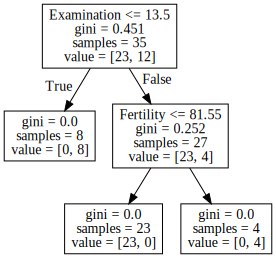

In [6]:
from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

Partial Dependence Plots (PDP) are useful for controlling the impact of specific features on all other features in a set. To restate this, how useful would this model be if used on a new dataset where only some of the inputs differ?

Are predicted differences between classes due to differences some particlar value, or due to some other factor?

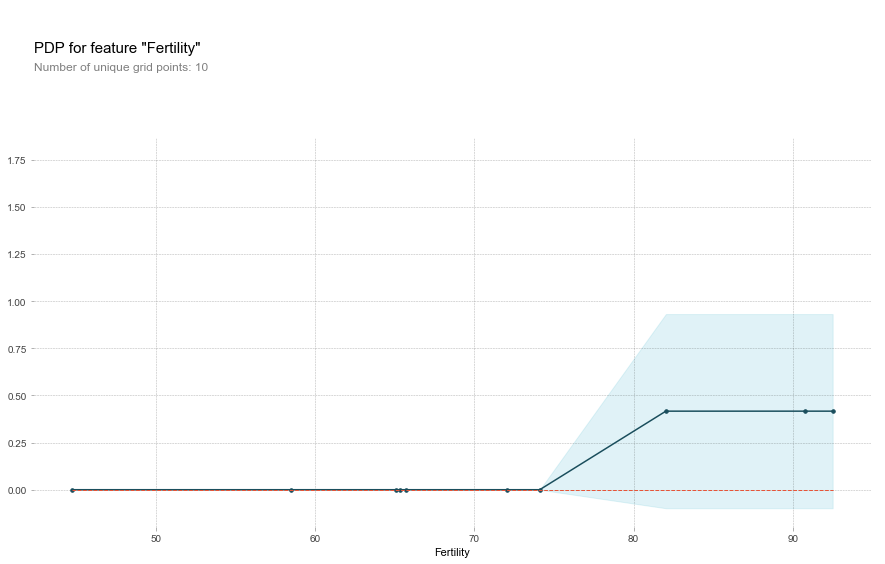

In [7]:
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature='Fertility')

# plot it
pdp.pdp_plot(pdp_goals, 'Fertility')
plt.show()

Partial dependence plots are calculated after a model has been fit. The model is fit on real data that has not been artificially manipulated in any way.

In our example, cantons may differ in many ways. At first glance, it seems difficult to disentangle the effect of these features.

To see how partial plots separate out the effect of each feature, we start by considering a single row of data. 

We will use the fitted model to predict our outcome (probability that someone from this canton is catholic or protestant). But we repeatedly alter the value for one variable to make a series of predictions. We trace out predicted outcomes (on the vertical axis) as we move from small values of ball possession to large values (on the horizontal axis).

In this description, we used only a single row of data. Interactions between features may cause the plot for a single row to be atypical. So, we repeat that mental experiment with multiple rows from the original dataset, and we plot the average predicted outcome on the vertical axis.

In the above example we use a very simple model but this can extend even to much more complicated models.

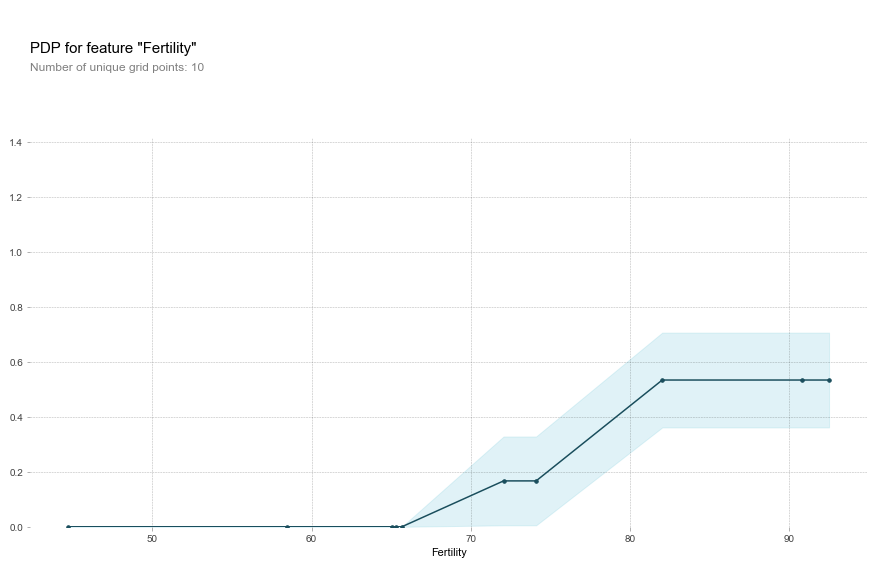

In [8]:
# Build Random Forest model
feature_to_plot = 'Fertility'
rf_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

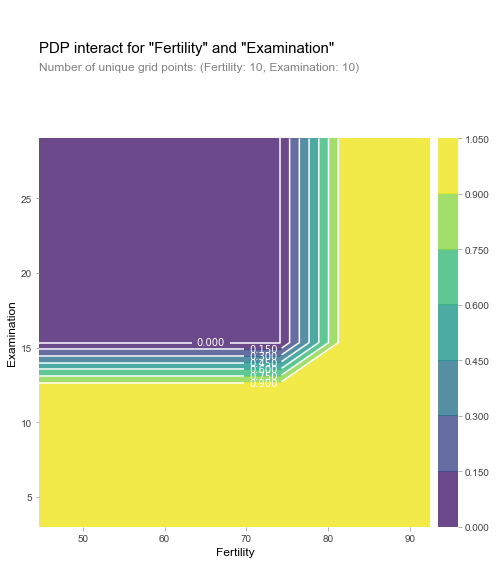

In [9]:
# Similar to previous PDP plot except we use pdp_interact instead of pdp_isolate and pdp_interact_plot instead of pdp_isolate_plot
features_to_plot = ['Fertility', 'Examination']
inter1  =  pdp.pdp_interact(model=tree_model, dataset=val_X, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()